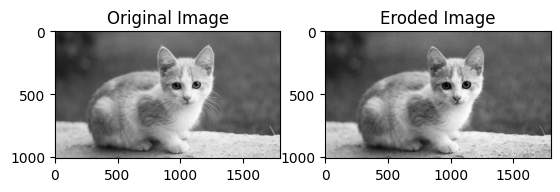

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

img_rest= cv2.erode(imagen, kernel)
plt.subplot(121) 
plt.imshow(imagen, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.title('Eroded Image')
plt.show()


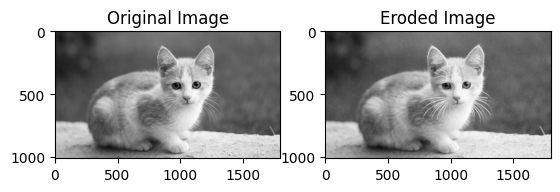

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

img_rest= cv2.dilate(imagen, kernel)

plt.subplot(121) 
plt.imshow(imagen, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.title('Eroded Image')
plt.show()


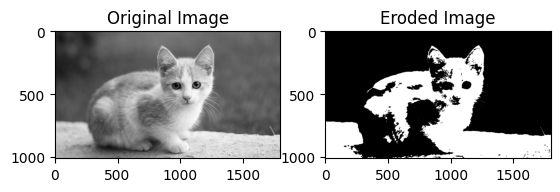

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)
_,img_bin= cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

img_rest= cv2.erode(img_bin, kernel)

plt.subplot(121) 
plt.imshow(imagen, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.title('Eroded Image')
plt.show()


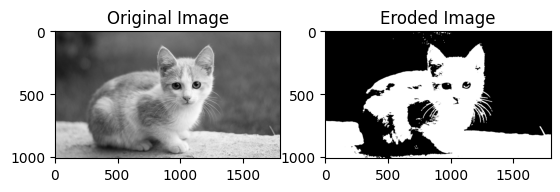

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)
_,img_bin= cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

img_rest= cv2.dilate(img_bin, kernel)

plt.subplot(121) 
plt.imshow(imagen, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.title('Eroded Image')
plt.show()


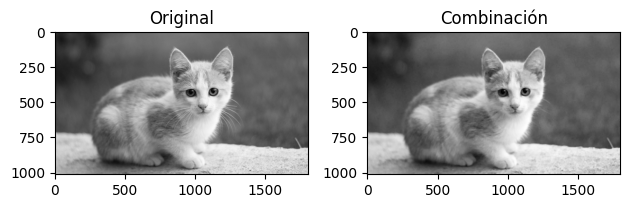

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import erosion, dilation, opening, closing

imagen = cv2.imread('gato.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), dtype=bool)

combinacion = erosion(imagen, kernel)
combinacion = dilation(imagen, kernel)
combinacion = opening(imagen, kernel)
combinacion = closing(imagen, kernel)

combinacion = closing(opening(dilation(erosion(imagen, kernel), kernel), kernel), kernel)

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(combinacion, cmap='gray')
plt.title('Combinación')
plt.tight_layout()
plt.show()


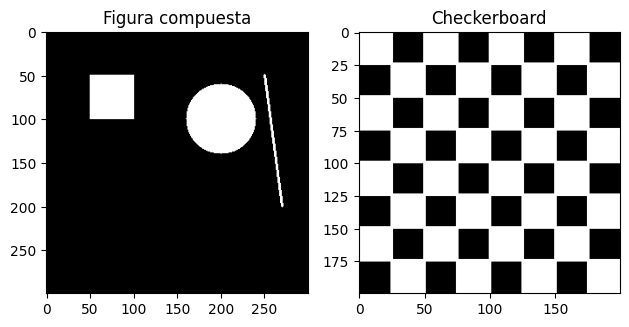

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import checkerboard

imagen = np.zeros((300, 300), dtype=np.uint8)
imagen = cv2.circle(imagen, (200, 100), 40, 255, -1)
imagen = cv2.rectangle(imagen, (50, 50), (100, 100), 255, -1)
imagen = cv2.line(imagen, (250, 50), (270, 200), 255, 2)

checker_img = checkerboard() > 0.5
checker_img = checker_img.astype(np.uint8) * 255

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.title('Figura compuesta')
plt.subplot(122)
plt.imshow(checker_img, cmap='gray')
plt.title('Checkerboard')
plt.tight_layout()
plt.show()

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

erode_cross = cv2.erode(imagen, kernel_cross, iterations=1)
dilate_cross = cv2.dilate(erode_cross, kernel_cross, iterations=1)

erode_rect = cv2.erode(imagen, kernel_rect, iterations=1)
dilate_rect = cv2.dilate(erode_rect, kernel_rect, iterations=1)

erode_ellipse = cv2.erode(imagen, kernel_ellipse, iterations=1)
dilate_ellipse = cv2.dilate(erode_ellipse, kernel_ellipse, iterations=1)

erode_checker = cv2.erode(imagen, checker_img, iterations=1)
dilate_checker = cv2.dilate(erode_checker, checker_img, iterations=1)

np.random.seed(42)
imagen_ruido = imagen.copy()
ruido = np.random.randint(0, 2, imagen.shape, dtype=np.uint8) * 255
imagen_ruido = cv2.add(imagen_ruido, ruido)

apertura = cv2.morphologyEx(imagen_ruido, cv2.MORPH_OPEN, kernel_ellipse)
cerradura = cv2.morphologyEx(imagen_ruido, cv2.MORPH_CLOSE, kernel_ellipse)


Conceptualizacion 

1. Transformada Hit-or-Miss
Es una operación morfológica binaria que permite detectar patrones específicos en una imagen, como esquinas o cruces, usando una combinación de condiciones: dónde debe haber 1s (hit) y dónde debe haber 0s (miss).

2. Dilatación Geodésica
Expande una región (marcador) respetando los límites definidos por otra imagen (máscara). La expansión solo ocurre donde la máscara lo permite.

3. Erosión Geodésica
Contrae una región (marcador) sin reducirla más allá de los límites establecidos por una máscara. La erosión está restringida a esa área.

HIT-or-miss

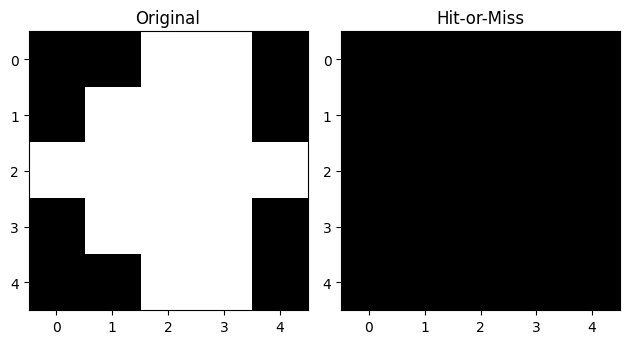

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import binary_hit_or_miss

imagen = np.array([[0, 0, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 1, 0]], dtype=bool)

resultado = binary_hit_or_miss(imagen)

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(resultado, cmap='gray')
plt.title('Hit-or-Miss')
plt.tight_layout()
plt.show()


Dilatación Geodésica

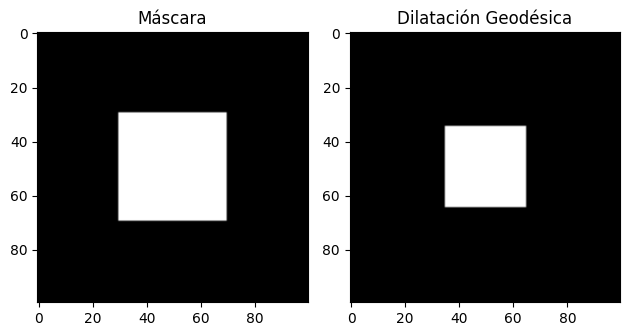

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

marker = np.zeros((100, 100), dtype=np.uint8)
mask = np.zeros((100, 100), dtype=np.uint8)

marker[45:55, 45:55] = 255
mask[30:70, 30:70] = 255

kernel = np.ones((3, 3), np.uint8)

for _ in range(10):
    marker = cv2.dilate(marker, kernel)
    marker = np.minimum(marker, mask)

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.subplot(122)
plt.imshow(marker, cmap='gray')
plt.title('Dilatación Geodésica')
plt.tight_layout()
plt.show()


 Erosión Geodésica 

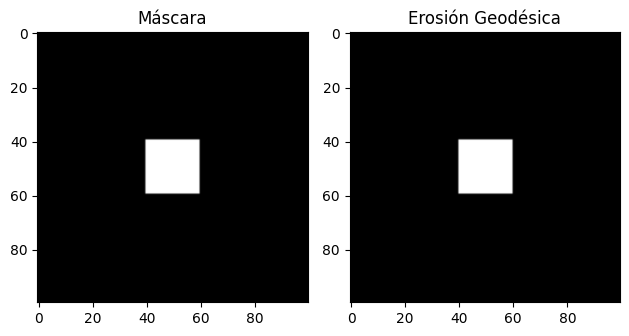

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

marker = np.zeros((100, 100), dtype=np.uint8)
mask = np.zeros((100, 100), dtype=np.uint8)

marker[30:70, 30:70] = 255
mask[40:60, 40:60] = 255

kernel = np.ones((3, 3), np.uint8)

for _ in range(10):
    marker = cv2.erode(marker, kernel)
    marker = np.maximum(marker, mask)

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.subplot(122)
plt.imshow(marker, cmap='gray')
plt.title('Erosión Geodésica')
plt.tight_layout()
plt.show()
